<a href="https://colab.research.google.com/github/Denis0213/MASTER-THESIS/blob/main/Copie_de_COVID_19_MSc_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. EXPLORATORY DATA ANALYSIS

# Data Source




The dataset used in this article is from the kaggle free datasets: Diagnosis of COVID-19 and its clinical spectrum
(https://www.kaggle.com/einsteindata4u/covid19/data?select=dataset.xlsx)

# Data visualization

In [ ]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.labelsize"] = 18 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Data overview
from google.colab import files
import io
uploaded= files.upload()

Saving covid_19.xlsx to covid_19.xlsx


In [ ]:
data=pd.read_excel(io.BytesIO(uploaded['covid_19.xlsx']))
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset´s shape

df1=data.copy()
df1.shape

(5644, 111)

The dataset contains 5644 raws and 111 columns. The raws are the different observations and the columns are the variables or features.

# Understanding Data

# Target variable
The target variable is "SARS-Cov-2 exam result"

In [ ]:
# the others variables overview
df1.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [ ]:
# Variables types
df1.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

The dataset contains 3 types of variables which are integer, float and object. So there are numerical variables (integer and float) and categorical variables (object).

#Numerical variables

In [ ]:
# List of numerical variables
numerical_variables=[feature for feature in df1.columns if df1[feature].dtypes !='O']
df1[numerical_variables].head(5)

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,NaN,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 74 variables numerical in the dataset. Except for the first 4, we notice that these numerical variables correspond to the blood tests.

In [ ]:
# Discrete numerical variables
discrete_feature=[feature for feature in numerical_variables if len(df1[feature].unique())<25 and feature !='id'and feature !='stroke']
df1[discrete_feature].head(5)

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Basophils,Mycoplasma pneumoniae,Potassium,Sodium,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Ionized calcium,Magnesium,Fio2 (venous blood gas analysis),Rods #,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Sugar,Partial thromboplastin time (PTT),"Prothrombin time (PT), Activity",Vitamin B12,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),Base excess (arterial blood gas analysis),HCO3 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,-0.223767,NaN,-0.305787,0.862512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 34 independant discrete numerical variables

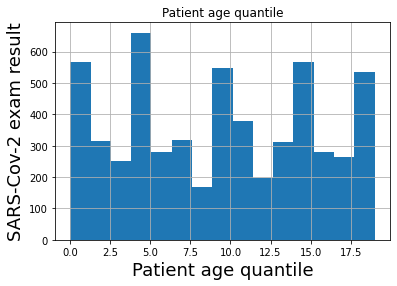

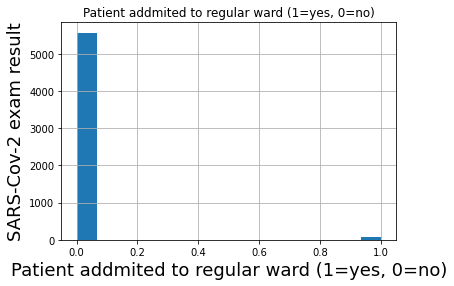

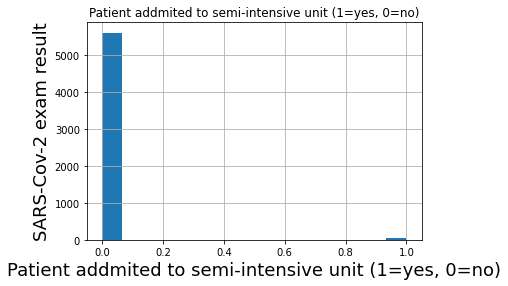

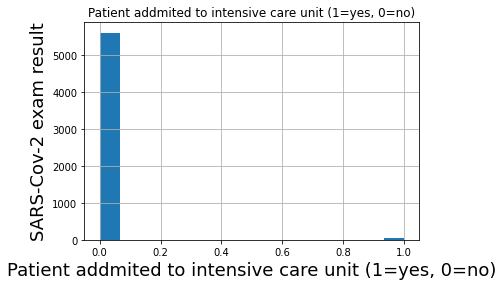

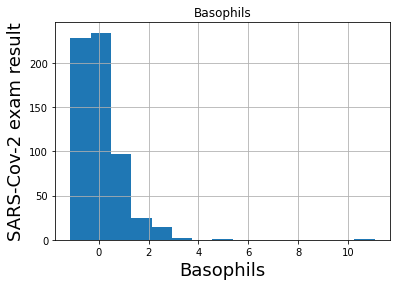

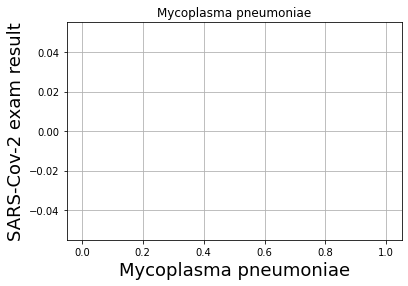

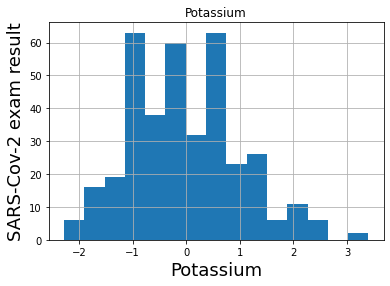

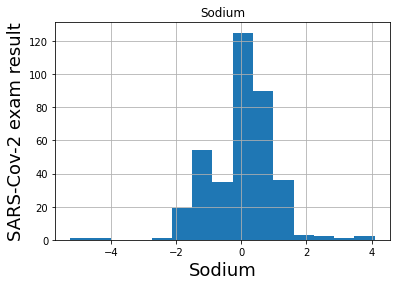

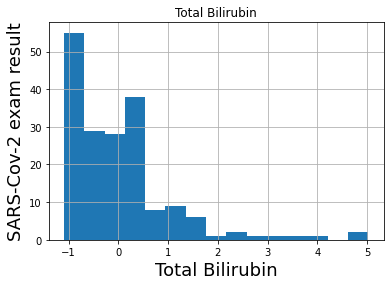

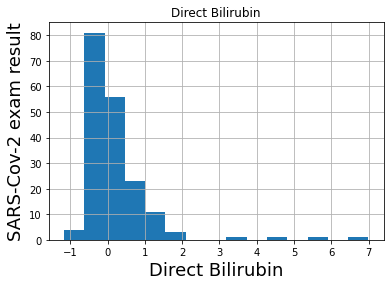

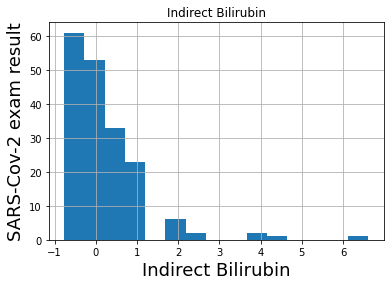

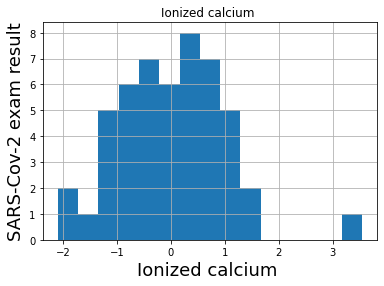

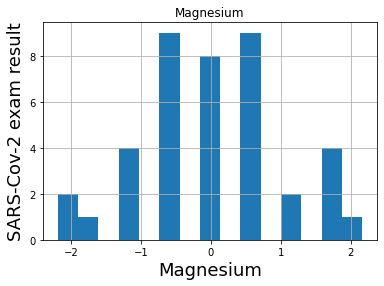

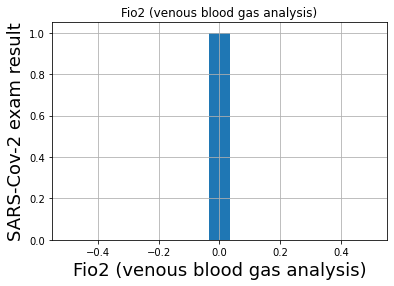

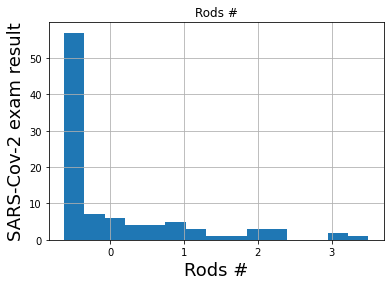

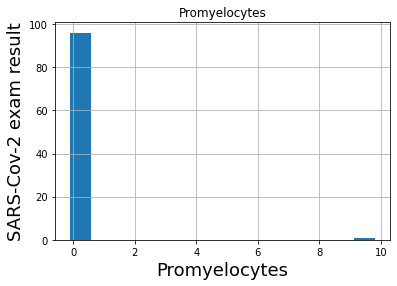

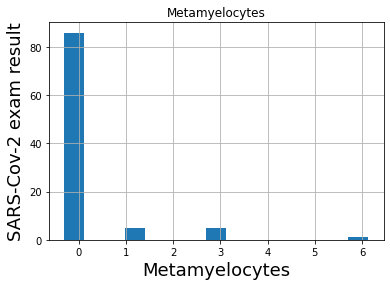

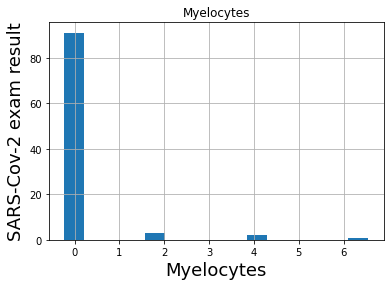

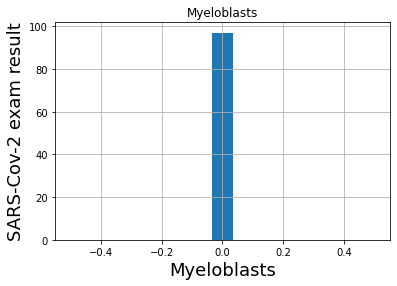

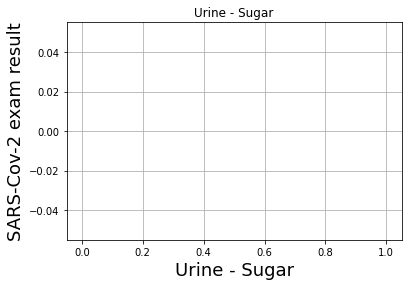

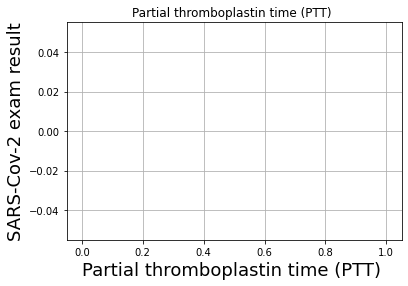

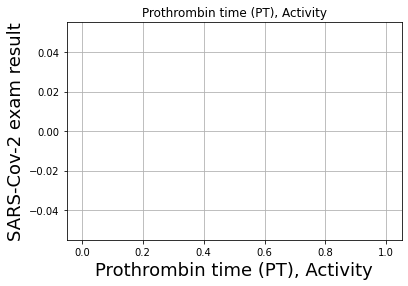

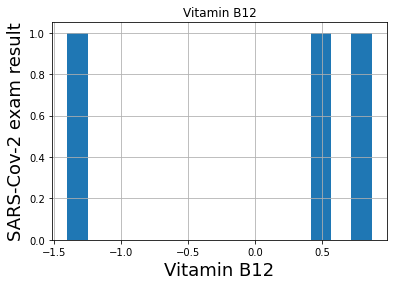

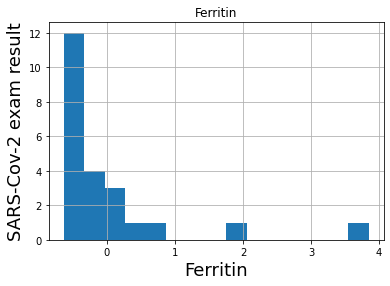

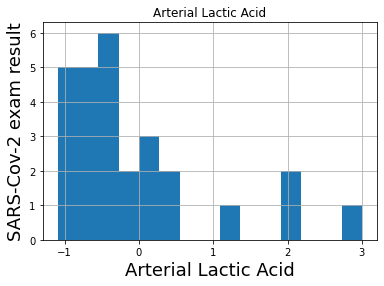

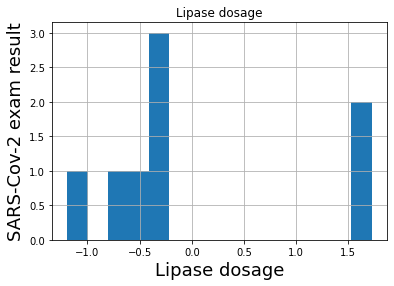

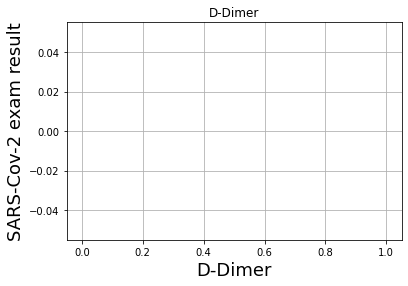

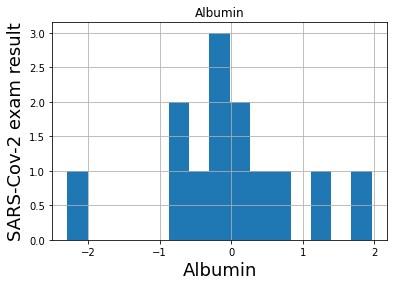

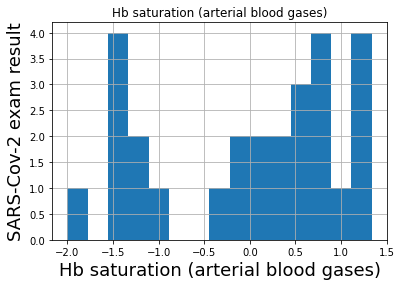

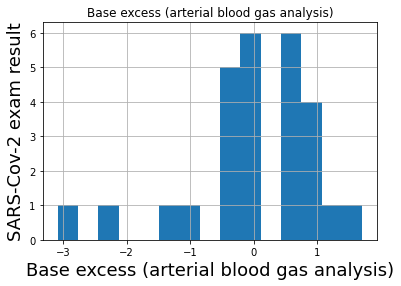

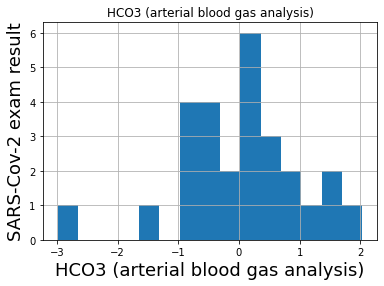

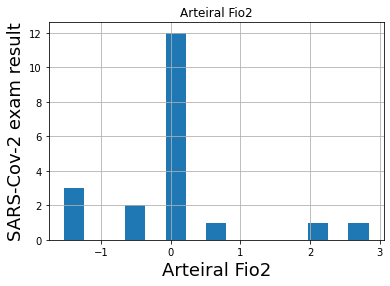

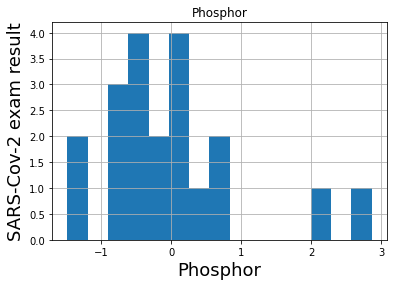

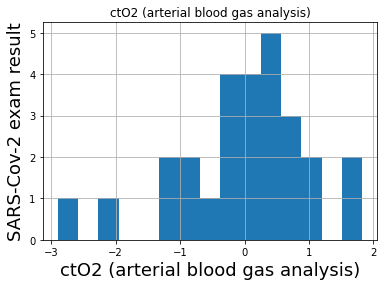

In [ ]:
# Relationship between discrete variables and the target variable
for feature in discrete_feature:
    df1[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel('SARS-Cov-2 exam result')
    plt.title(feature)
    plt.show()

We notice that there are 2 categories of festures. The first category consists of features that have a relationship with the target variable and the second category consists of features that have no relationship with the target variable. The second category consists of those 5 following features which are Mycoplasma pneumoniae, Urine-Sugar, Partial thromboplastin time (PTT), Prothrombin time (PT) Activity and D-Dimer. As a result, they may not be taken into account in the construction of our model.

In [ ]:
# Continuous numerical variables
continuous_feature=[feature for feature in numerical_variables if feature not in discrete_feature and feature !='id'and feature !='stroke']

df1[continuous_feature].head(5)

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Alkaline phosphatase,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Segmented,Urine - Density,Urine - Red blood cells,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),pCO2 (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),pO2 (arterial blood gas analysis)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,-0.619086,1.198059,-0.147895,2.089928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


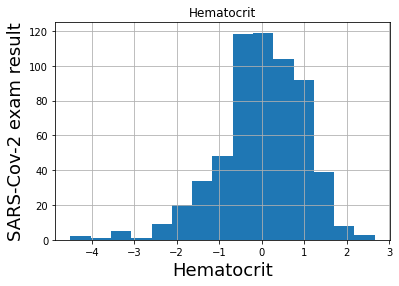

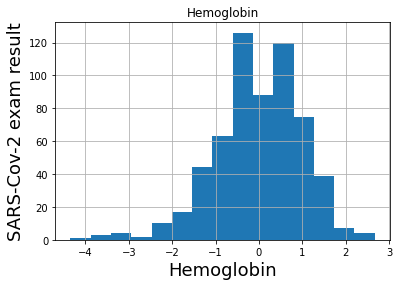

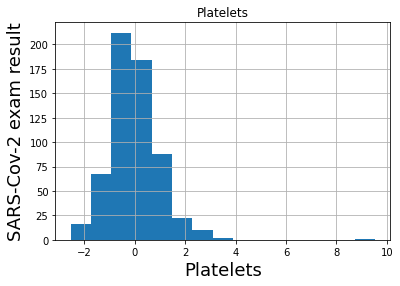

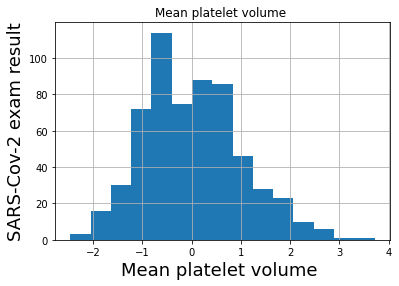

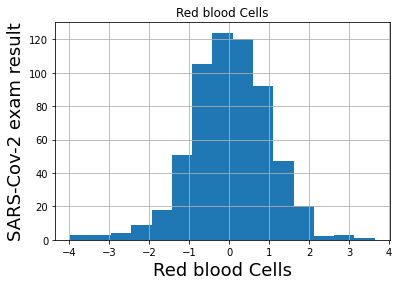

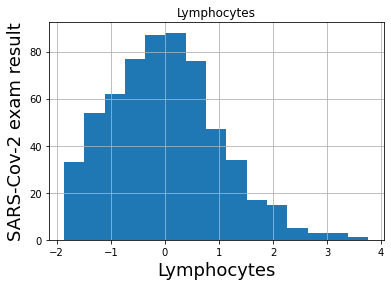

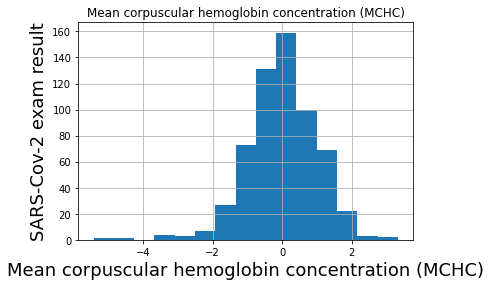

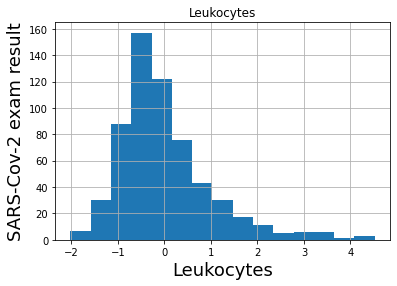

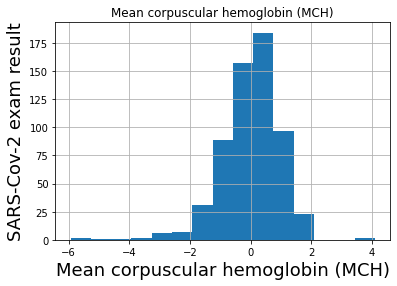

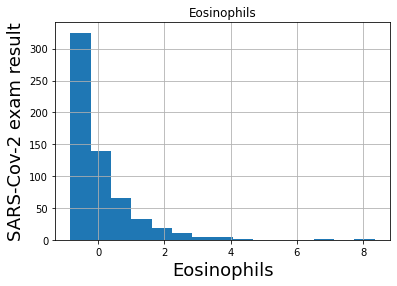

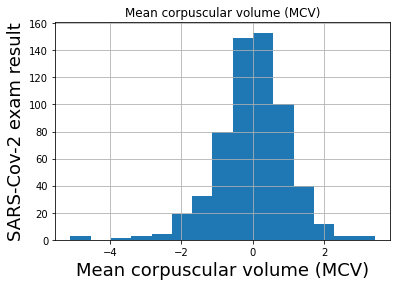

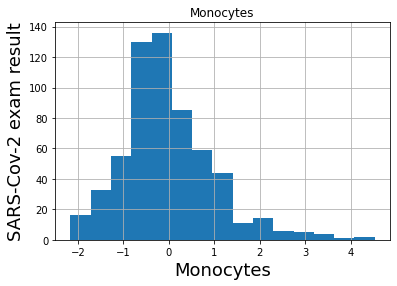

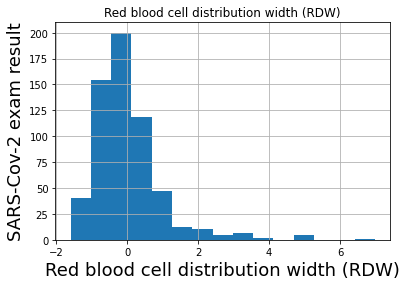

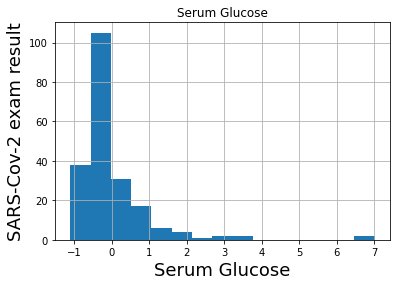

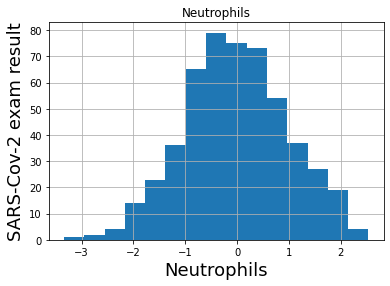

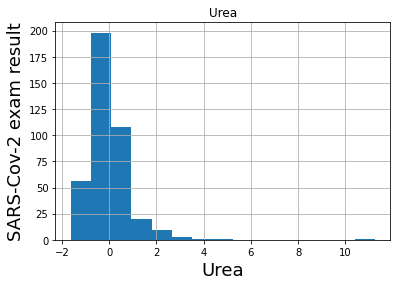

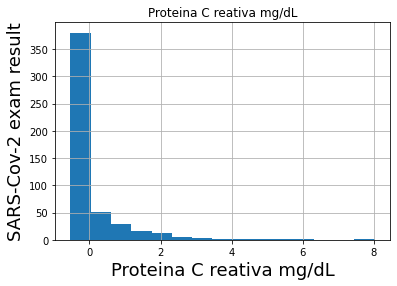

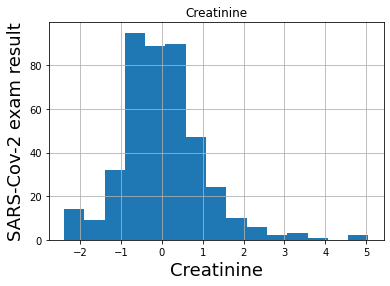

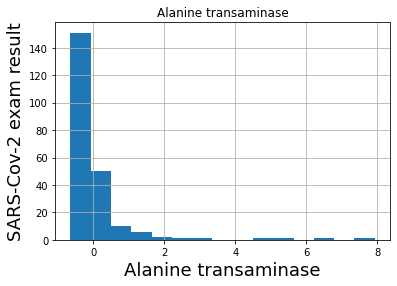

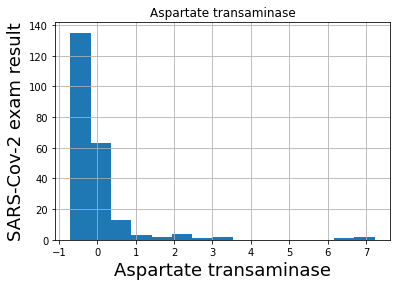

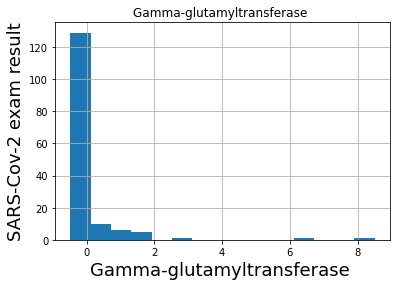

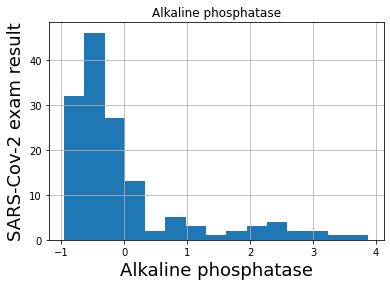

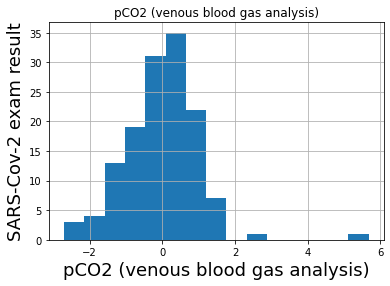

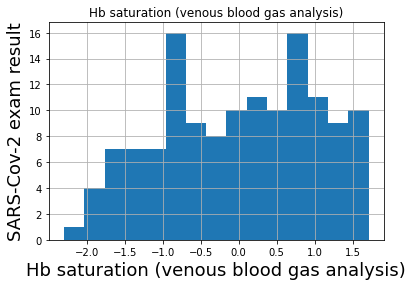

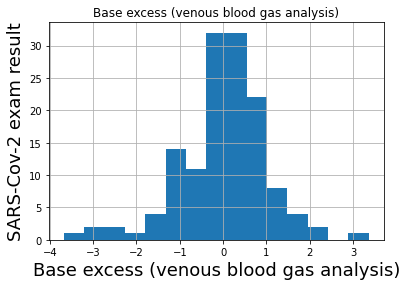

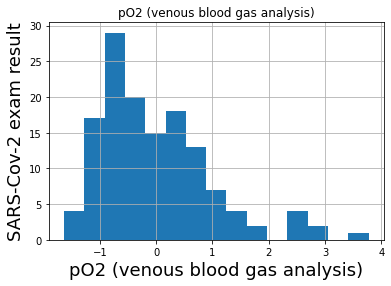

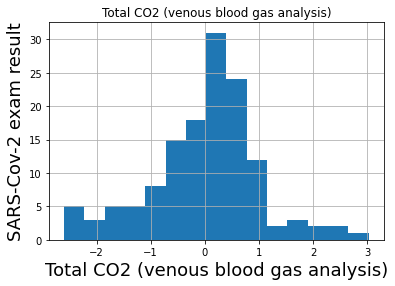

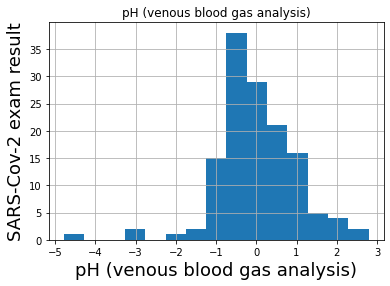

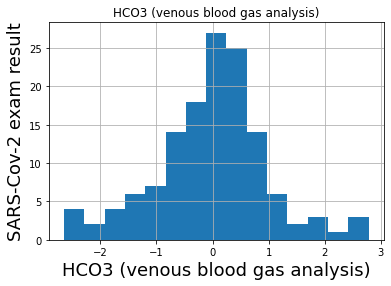

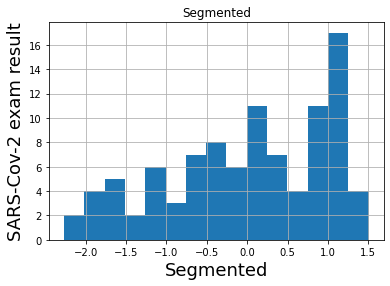

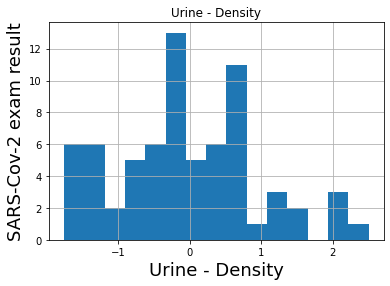

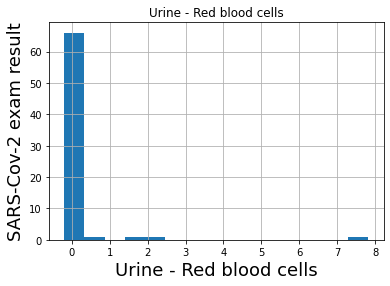

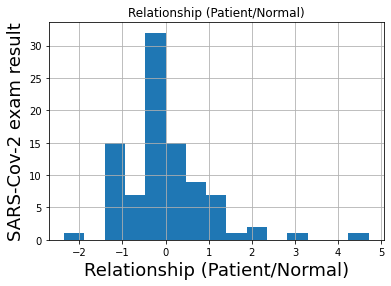

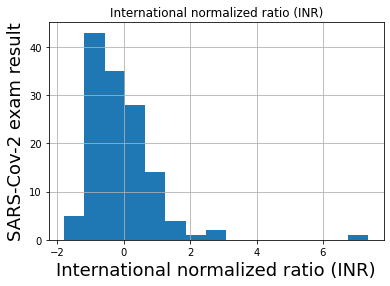

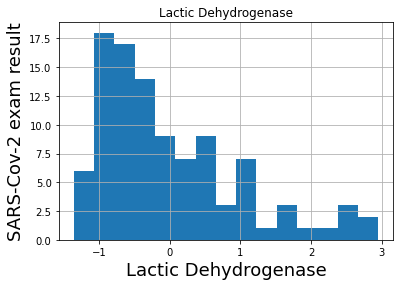

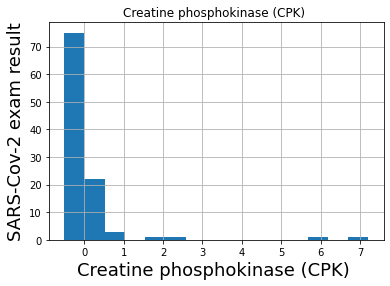

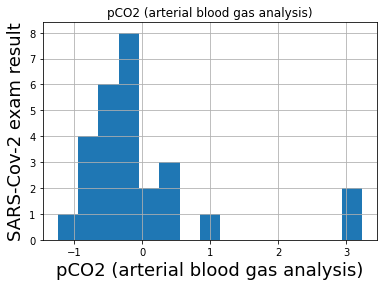

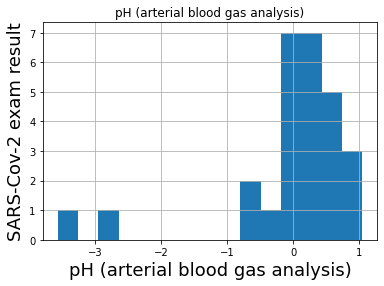

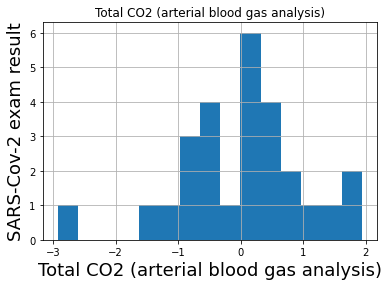

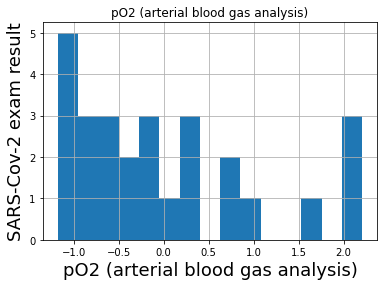

In [ ]:
# Relationship between continuous variables and the target variable
for feature in continuous_feature:
    df1[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel('SARS-Cov-2 exam result')
    plt.title(feature)
    plt.show()

We notice that all the continuous features have a relationship with the target feature.

# Outliers

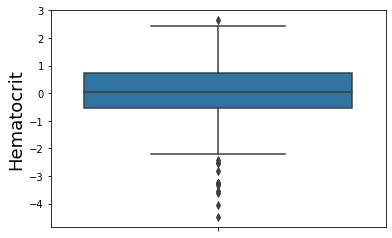

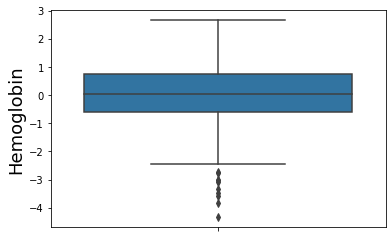

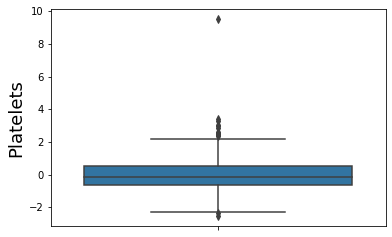

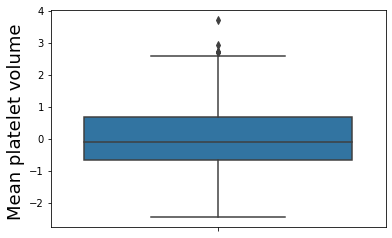

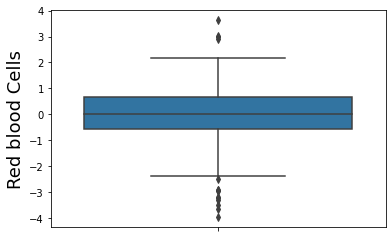

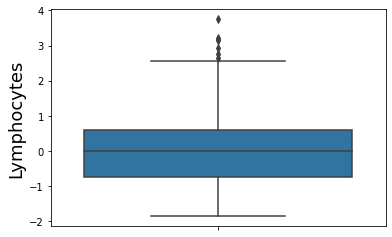

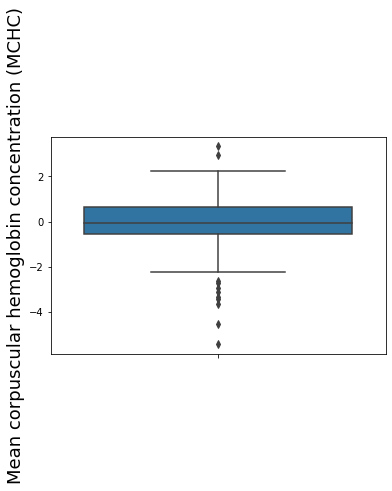

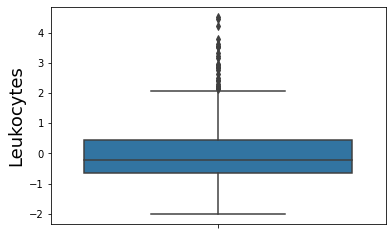

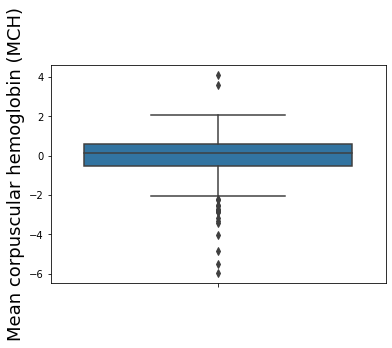

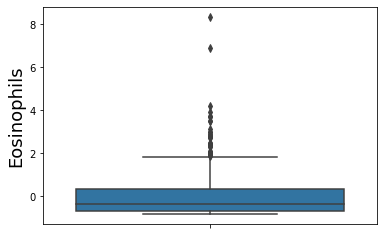

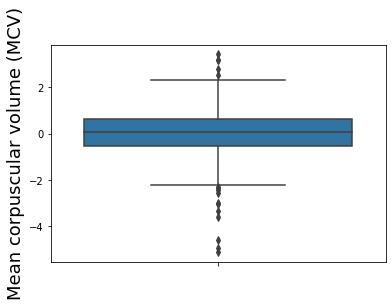

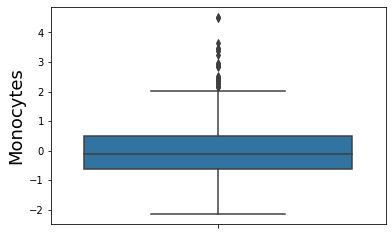

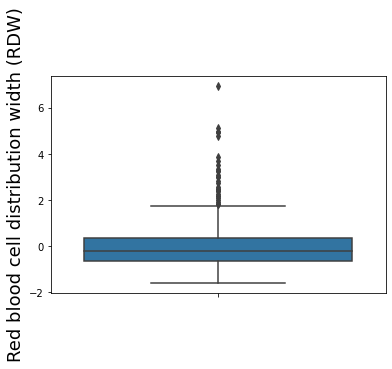

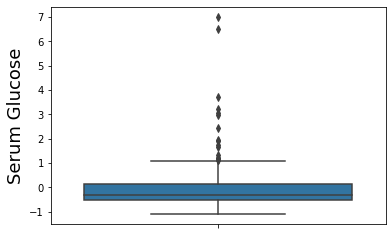

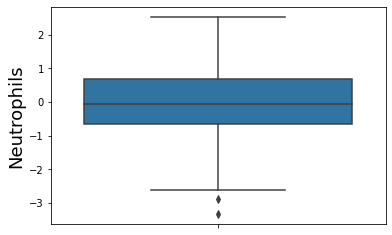

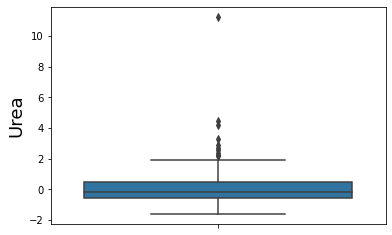

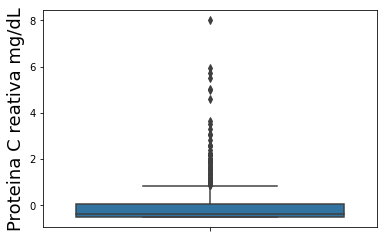

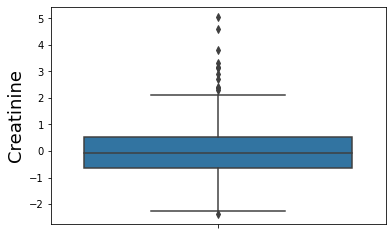

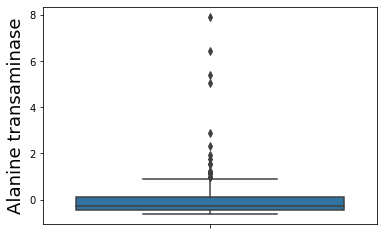

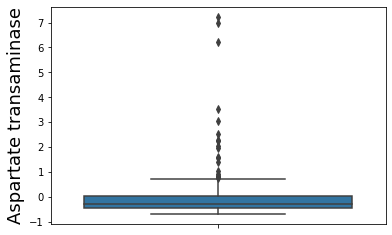

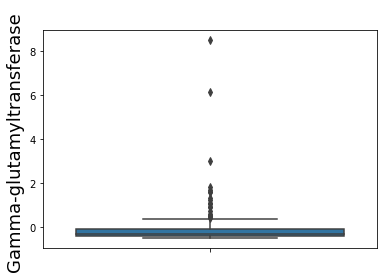

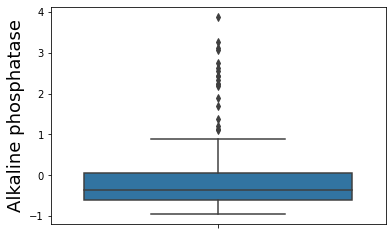

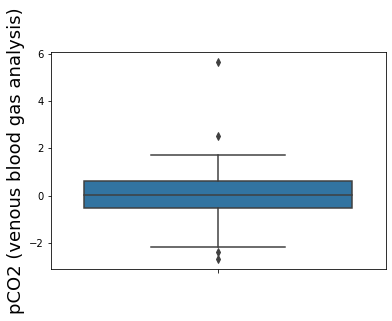

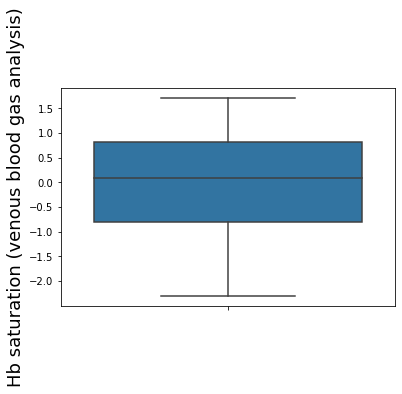

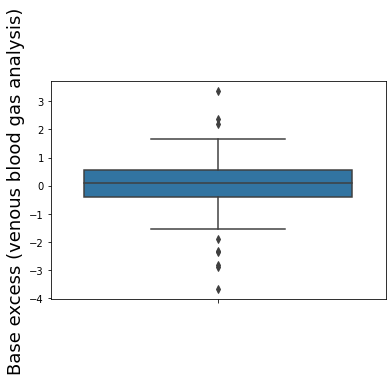

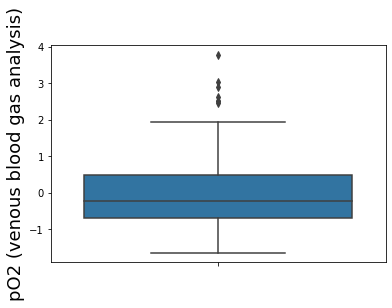

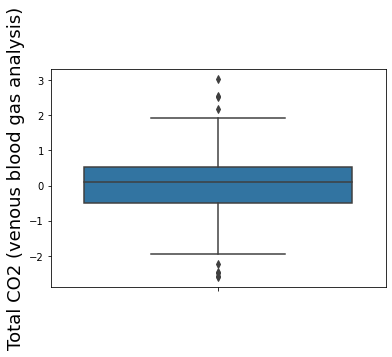

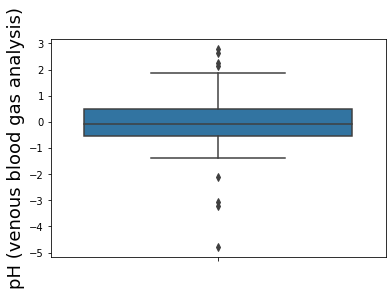

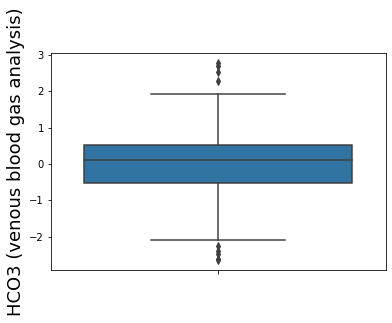

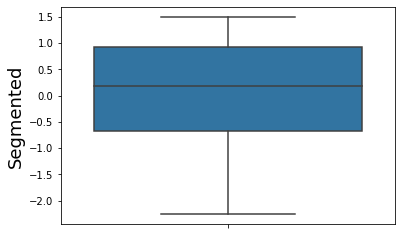

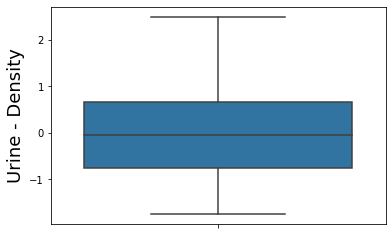

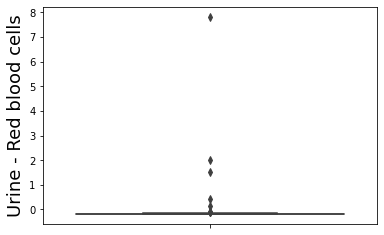

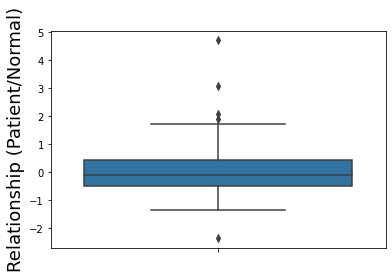

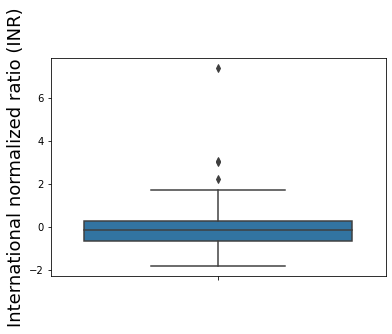

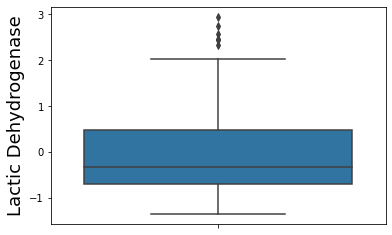

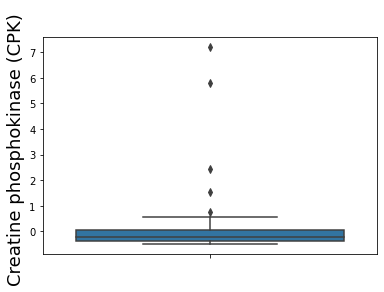

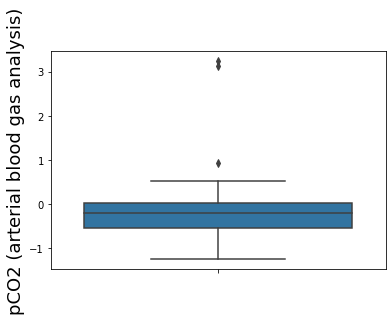

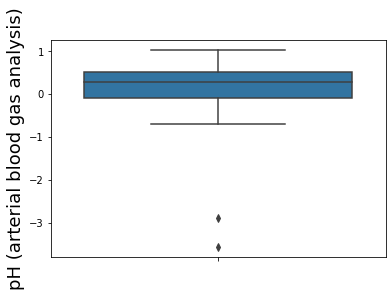

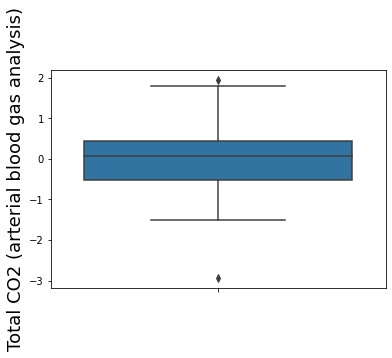

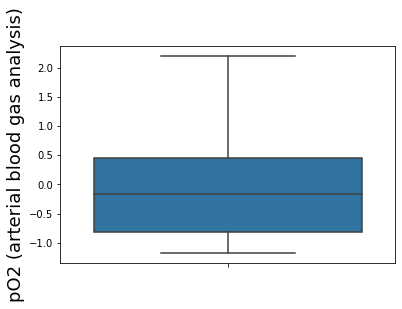

In [ ]:
for feature in continuous_feature:
    plt.figure()
    sns.boxplot(y=df1[feature])

Except for the 4 features which are Hb saturation (venous blood gas analysis), Segmented, Urine-Density and pO2(arterial blood gas analysis), the continuous numerical features haves outliers.

#Categorical variables

In [ ]:
# Categorical features overview
categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O' ]
df1[categorical_feature].head()

,Patient ID,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Strepto A,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color
0,44477f75e8169d2,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are several categorical features. They'll need to be encoded before the computer processing. We notice that these categorical variables correspond to the viral tests.

In [ ]:
# Categorical variables values
for feature in df1[categorical_feature] :
    print(f'{feature :-<50} {df1[feature].unique()}')

Patient ID---------------------------------------- ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus--

Some categorial features have an only one category. They must be dropped because they have no effect on the target feature. Those feature are Parainfluenza 2, Urine - Hyaline cylinders, Urine - Granular cylinders and Urine - Yeasts.

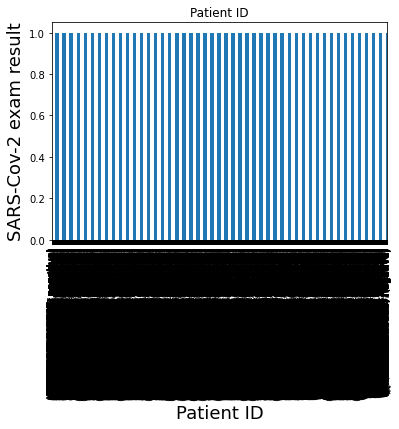

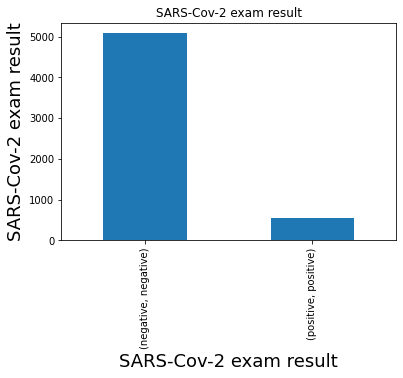

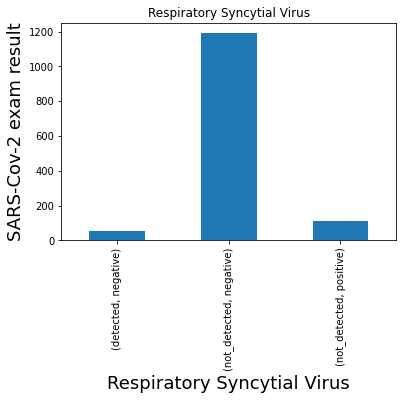

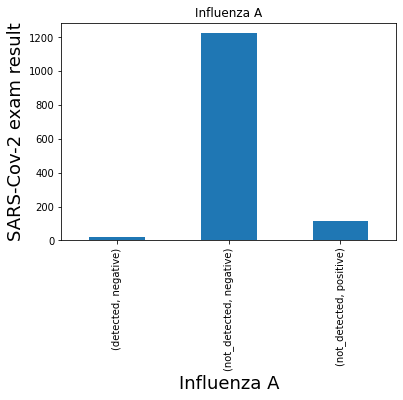

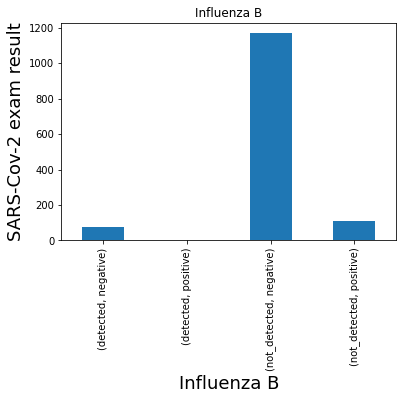

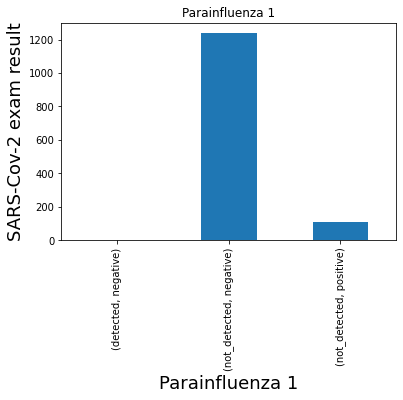

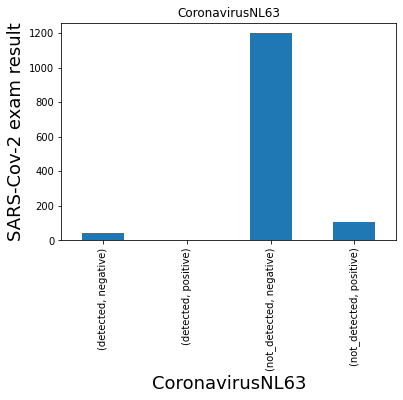

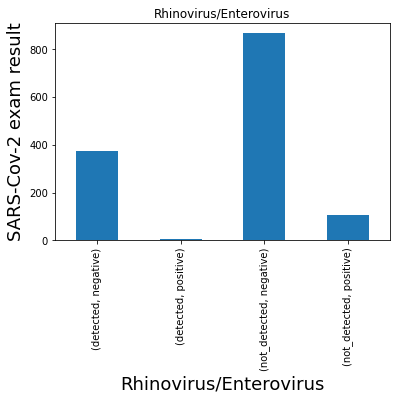

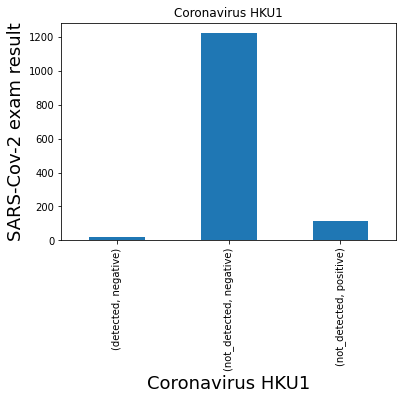

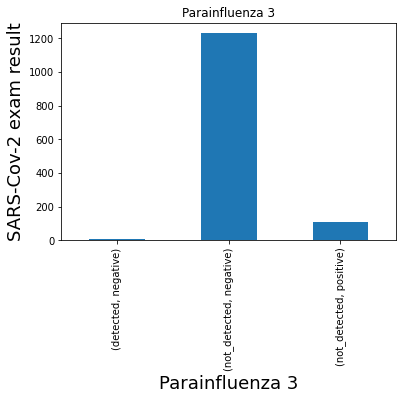

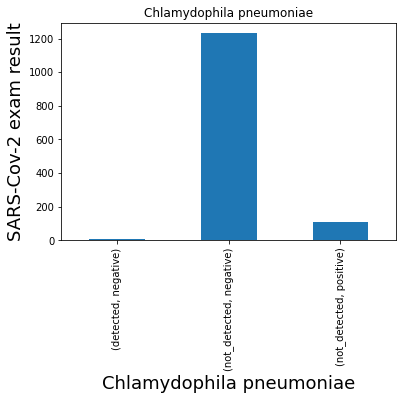

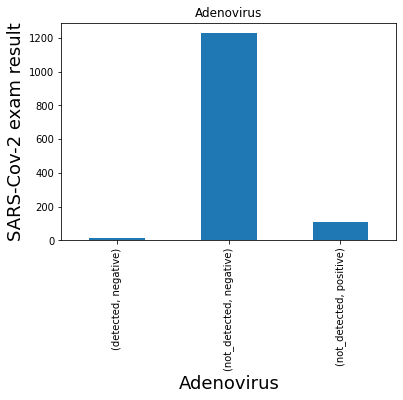

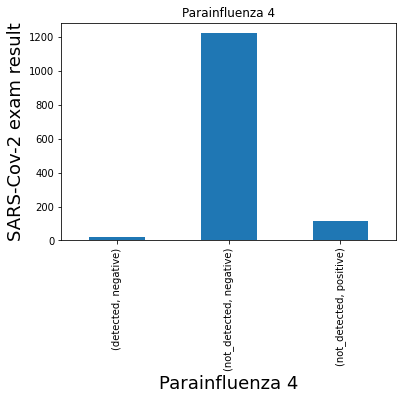

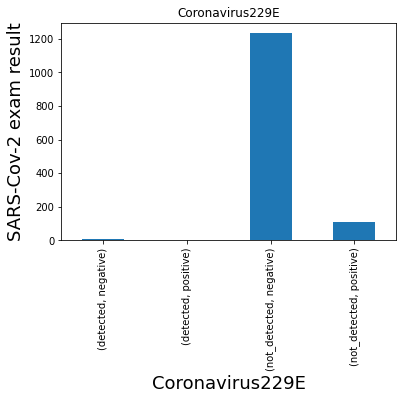

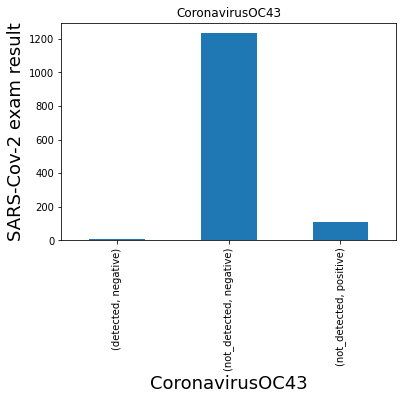

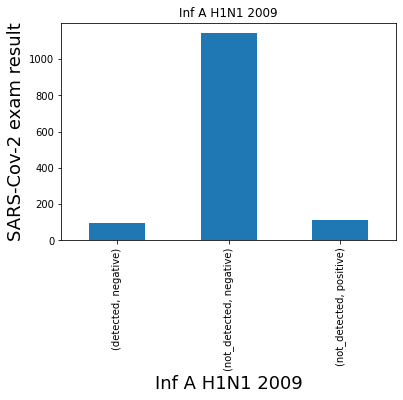

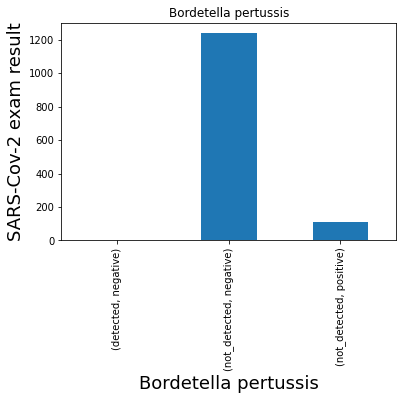

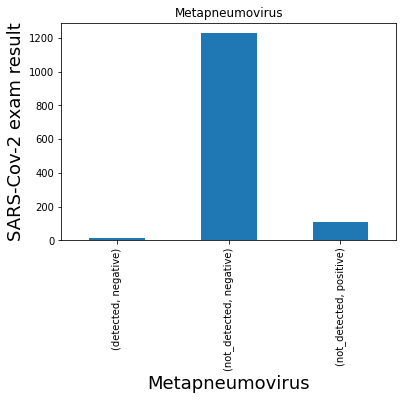

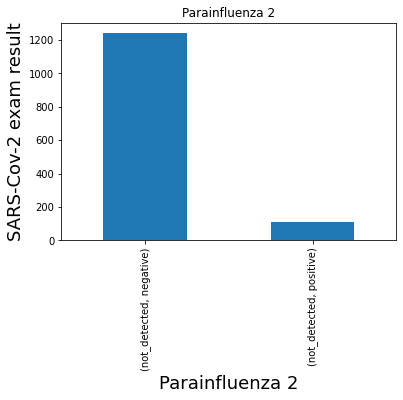

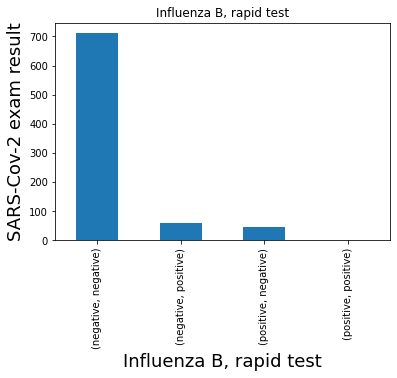

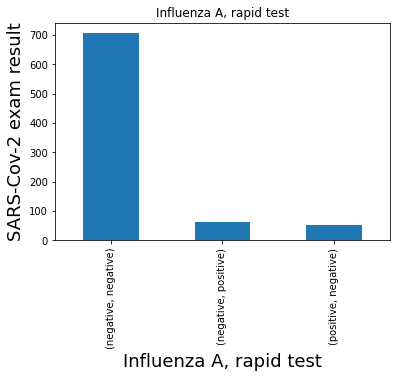

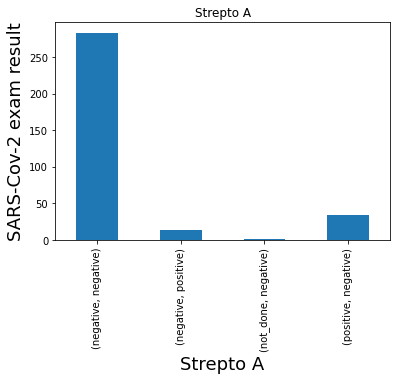

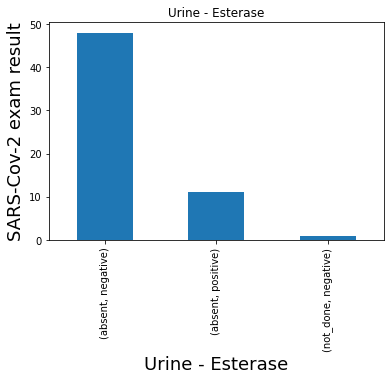

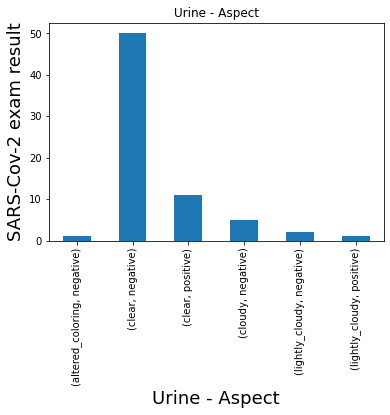

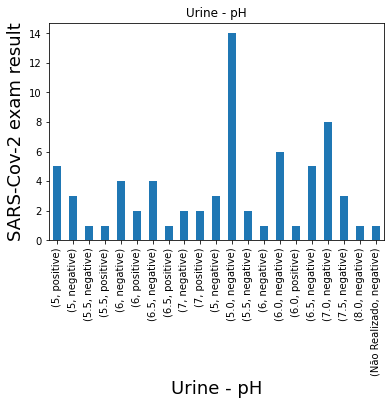

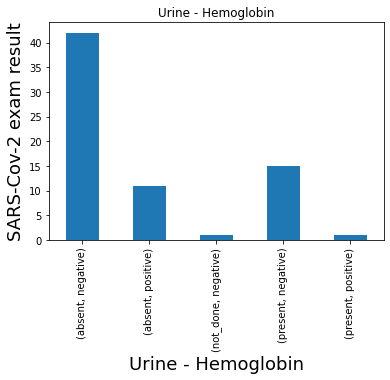

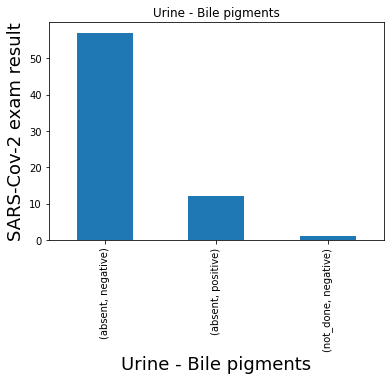

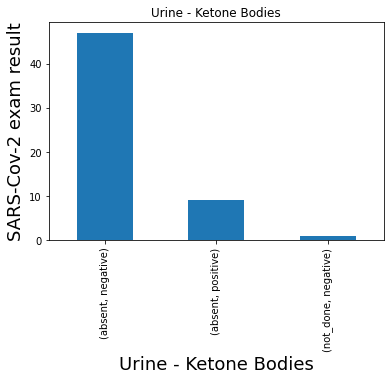

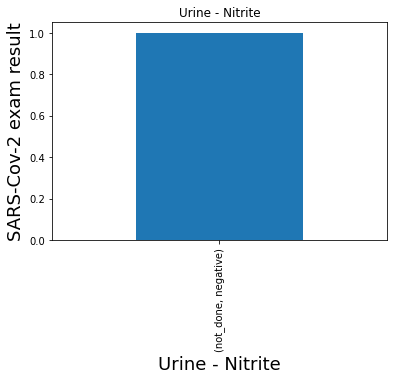

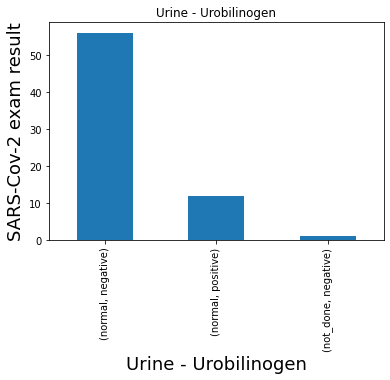

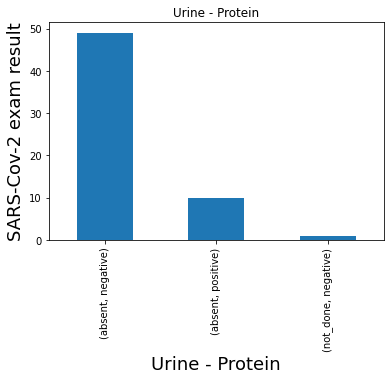

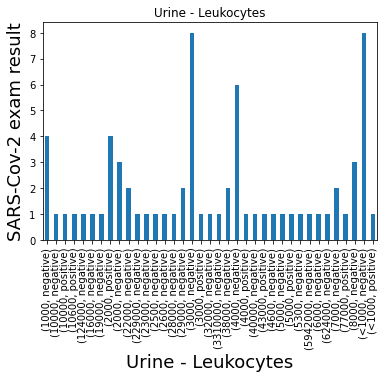

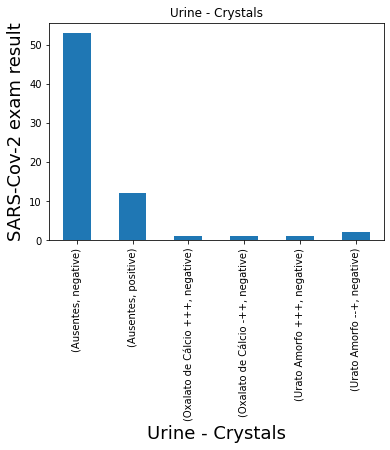

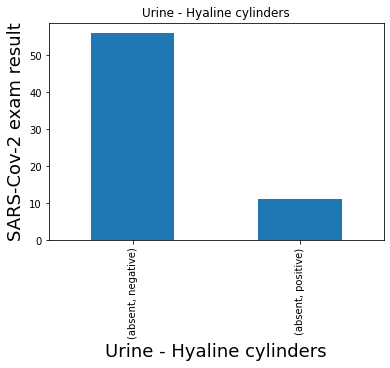

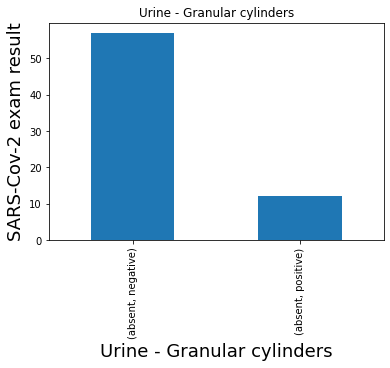

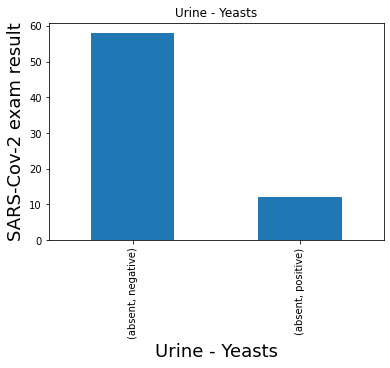

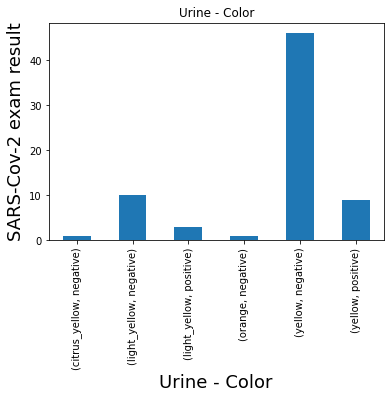

In [ ]:
# Relationship between categorical variables (viral tests) and the target variable (Covid-19)
#categorical_feature=df1[categorical_feature].drop(df1['Patient ID'],axis=1)
for feature in categorical_feature:
    data.groupby(feature)['SARS-Cov-2 exam result'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SARS-Cov-2 exam result')
    plt.title(feature)
    plt.show()

# Missing values

In [ ]:
#Check if any null value is present
df1.isnull().values.any()

True

The mining of that result is that the dataset contains missing datas.
Therefore we must find the variables which contain those missing values.

In [ ]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [ ]:
# Missing values rate per variable

(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True) 

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

Missing values analysis revealed three groups of variables:
- Variables with 76% missing values;
- Variables with around 89% missing values;
- Variables with more than 90% missing values.

Variables with more than 90% missing values are useless for the model. They must be deleted.

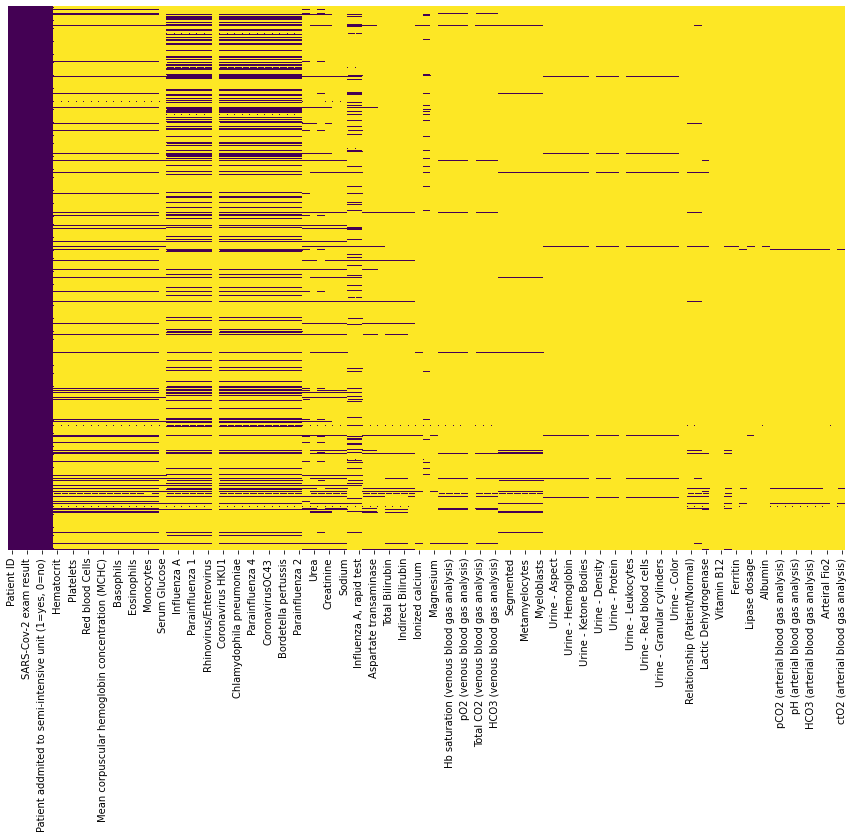

In [ ]:
# Plotting missing values
plt.figure(figsize=(15,10))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Yellow spaces represente missing values. The 5 first features which are Patient Id, Patient age quantile,SARS-Cov-2 exam result, Patient addmited to regular ward and Patient addmited to semi-intensive unit have no missing values. The following variables are those with around 89% missing values. Then we have the variables with 76% missing values. Finally, those with at least 90% missing values.

Also, a search on the internet allows us to discover that :
- the variables that have 76% of missing values correspond to viral tests;
- The variables that have around 89% of missing values correspond to blood tests. 

We will retain only these 2 groups of variables, the target variable and the patient age quantile to build our model.

# Examination of the target variable

In [ ]:
# Number of target variable classes

df1['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

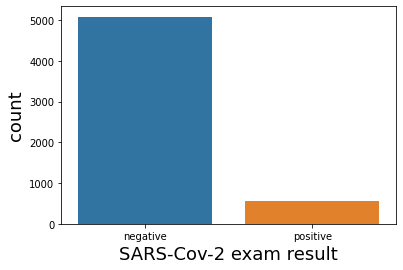

In [ ]:
#Visualization of the target variable

sns.countplot(x='SARS-Cov-2 exam result',data=df1)

In [ ]:
# Percentage of the target variable classes 

df1['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

The dataset is unbalanced because 90% of observations concern negative class (0) and 10% concern positive class.

# 2. DATA PRE-PROCESSING

#Feature selection

In [ ]:
# Missing values rate calculation
missing_rate = df1.isna().sum()/df1.shape[0]

In [ ]:
# Creating the two groups of variables
blood_columns = list(df1.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df1.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [ ]:
# The two other relevant variables
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [ ]:
# Creating the final model dataset
df1 = df1[key_columns + blood_columns + viral_columns]
df1.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [ ]:
df1.shape

(5644, 33)

Following the selection of variables, only 33 relevant variables remain to build the model.

# Train dataset - Test dataset

In [ ]:
# Train dataset - test dataset split

from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df1,test_size=0.2,random_state=0)

In [ ]:
# Verification of the number of target class in the train dataset 

trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
# Train dataset  target class rate

trainset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.900997
positive    0.099003
Name: SARS-Cov-2 exam result, dtype: float64

In [ ]:
# Verification of the number of target class in the test dataset  

testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
# Test dataset  target class rate

testset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901683
positive    0.098317
Name: SARS-Cov-2 exam result, dtype: float64

The train dataset and test dataset both have 90% of negative target class and 10% of positive target class

# Encoding - Missing values handling

In [ ]:
def encoding(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [ ]:
def imputation(df):
    df = df.dropna(axis=0)
    return  df

In [ ]:
def preprocessing(df):
    
    df = encoding(df)
    #df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
# Train dataset preprocessing
x_train,y_train=preprocessing(trainset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64


In [ ]:
# Test dataset preprocessing
x_test, y_test = preprocessing(testset)

0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


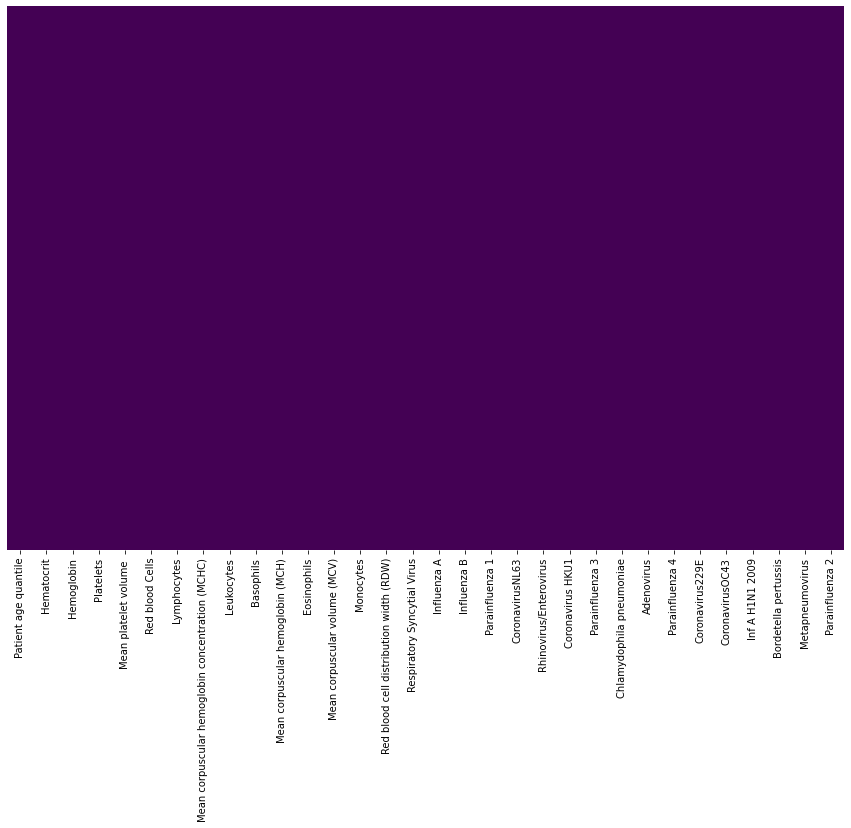

In [ ]:
# New plotting of missing values
df=x_train + x_test
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no longer missing values

# 3. MODEL BUILDING

## Librairies

In [ ]:
# loading librairies 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# List of models

We have a classification problem. So we will try different classification algorithms and choose the best. The classification algorithms we will use are:
 - A common binary classification algorithm: Logistic Regression
 - An effective algorithm on small datasets: SVM 
 - A bagging algorithm: Random Forest
 - A boosting algorithm: AdaBoost

# Model creation

In [ ]:
# A pipeline for feature engineering

preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [ ]:
# A pipeline for each model creation

LogisticRegression = make_pipeline(preprocessor, StandardScaler(), LogisticRegression(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))

# Learning and evaluation procedure

In [ ]:
# Libraries import
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
# Procedure code

def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [ ]:
# A dictionary for all models

dict_of_models = {'LogisticRegression':LogisticRegression,
                  'SVM': SVM,
                  'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost
                 }

LogisticRegression
[[51  3]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        54
           1       0.50      0.25      0.33        12

    accuracy                           0.82        66
   macro avg       0.68      0.60      0.61        66
weighted avg       0.79      0.82      0.79        66

SVM
[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66

RandomForest
[[51  3]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        54
           1       0.50      0.25      0.33        12

    accuracy                           0.82        66
   macro avg       0.68      0.60  

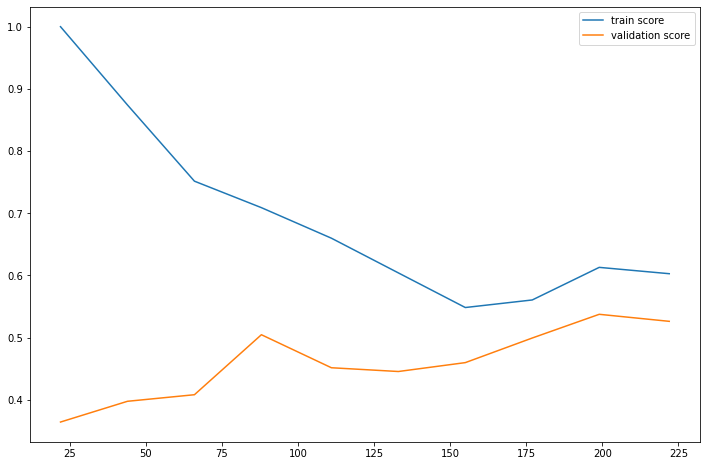

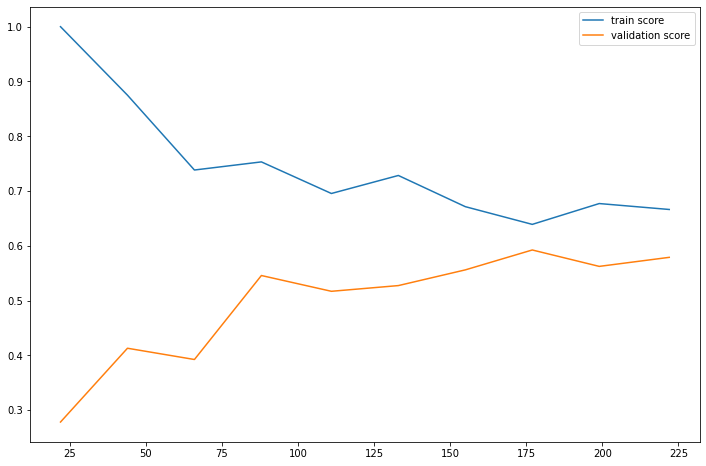

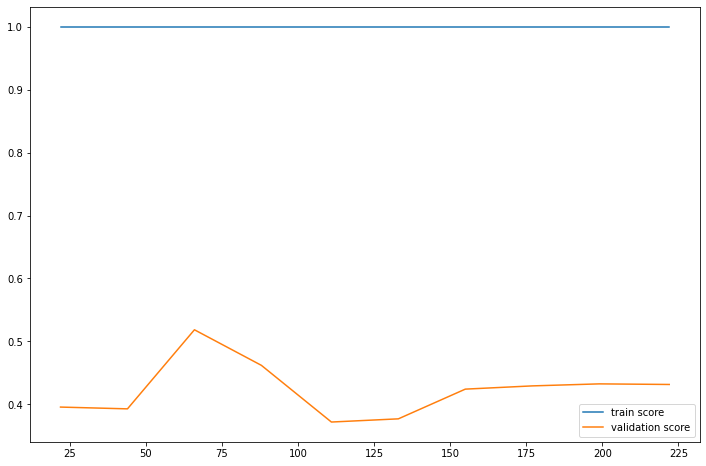

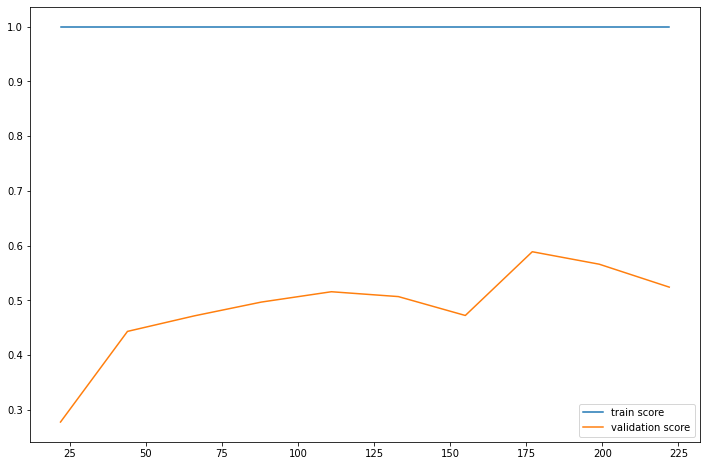

In [ ]:
# Models evaluation

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

# Choice of the best model

Since the dataset is unbalanced, we'll use the f1_score as metric to compare the different models.
SVM has the best value of f1_score (0.9 for class 0 and 0.42 for class 1). So, it's the best model. However, the score for class 1 is too low (less than 50%). Therefore, we'll try to improve it. Also,  when we look at the plottings, we see that it's train score and validation score are getting closer. So it's not overfiting.

# 4. OPTIMIZATION

In [ ]:
# Librairy import
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# RandomizedSearchCV use
# Hyperparameters dictionary creation
# RandomizedSearchCV object Creation

hyper_params = {'svc__gamma':[0.0001,0.0002,0.0003,0.0004,0.0005],
                'svc__C':[1, 10, 100, 1000,4000], 
               'pipeline__polynomialfeatures__degree':[2, 5],
               'pipeline__selectkbest__k': range(45, 60)}
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=100)



In [ ]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x7f8a6508c560>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel

In [ ]:
# RandomizedSearchCv training
grid.fit(x_train, y_train)

# Best hyperparameters display
print(grid.best_params_)

# Prediction vector creation
y_pred = grid.predict(x_test)

# Evaluation 
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0003, 'svc__C': 4000, 'pipeline__selectkbest__k': 58, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.55      0.50      0.52        12

    accuracy                           0.83        66
   macro avg       0.72      0.70      0.71        66
weighted avg       0.83      0.83      0.83        66



[[49  5]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.55      0.50      0.52        12

    accuracy                           0.83        66
   macro avg       0.72      0.70      0.71        66
weighted avg       0.83      0.83      0.83        66



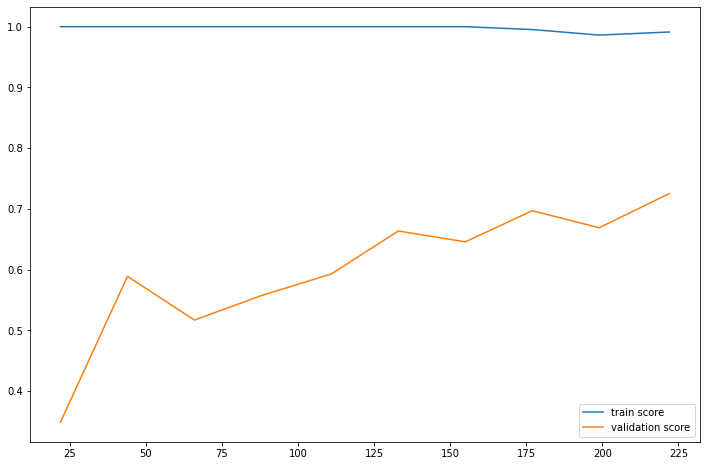

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
# precision threshold determination
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

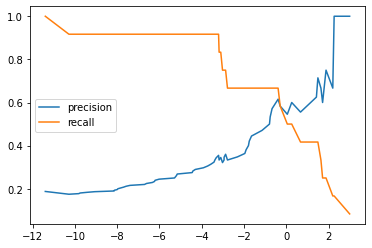

In [ ]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
# Final model creation
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, x_test, threshold=-1)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
f1_score(y_test, y_pred)

0.5714285714285715

# UTILISATION DE SMOTE

In [ ]:
# implementing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Creating SMOTE object
smote=SMOTE()

In [ ]:
x_train_smote,y_train_smote=smote.fit_sample(x_train,y_train)

In [ ]:
# Shape verification
from collections import Counter
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0: 258, 1: 38})
After SMOTE:  Counter({0: 258, 1: 258})


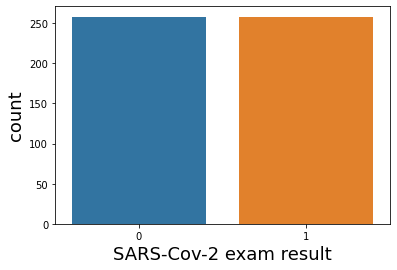

In [ ]:
#Visualization of the target variable after SMOTE
df_smote=pd.DataFrame(y_train_smote, columns=['SARS-Cov-2 exam result'])
sns.countplot(x='SARS-Cov-2 exam result',data=df_smote)

L'ensemble de données d'entrainement est maintenant équilibré

In [ ]:
# Model creation
from sklearn.metrics import accuracy_score
def evaluation(model):
    
    model.fit(x_train_smote, y_train_smote)
    ypred = model.predict(x_test)
    
    #print(confusion_matrix(y_test, ypred))
    #print(classification_report(y_test, ypred))
    print(accuracy_score(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

LogisticRegression
0.803030303030303
SVM
0.7727272727272727
RandomForest
0.803030303030303
AdaBoost
0.7575757575757576


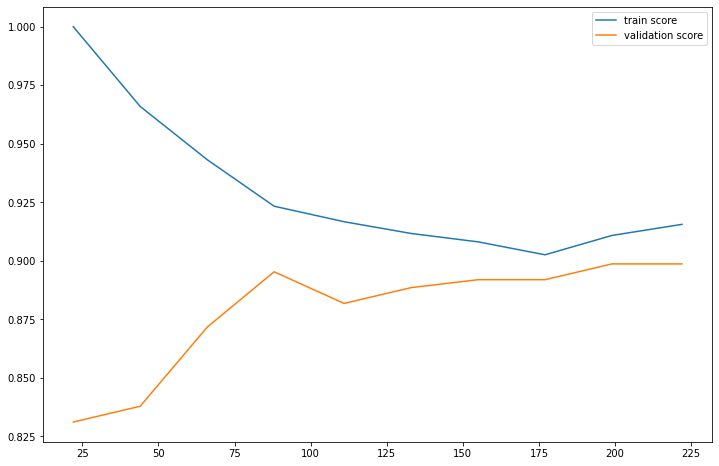

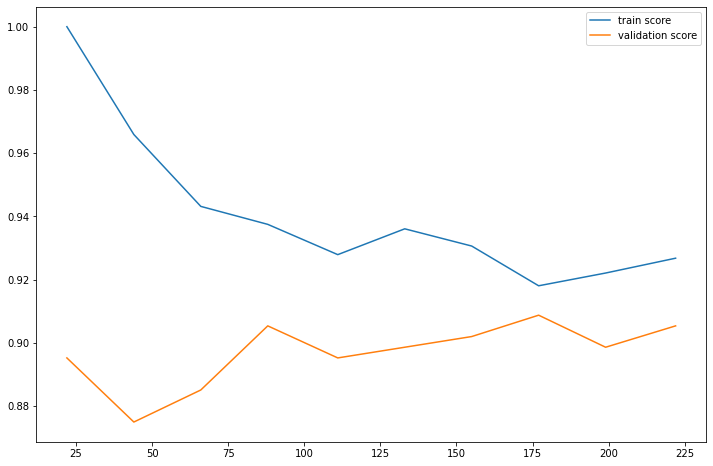

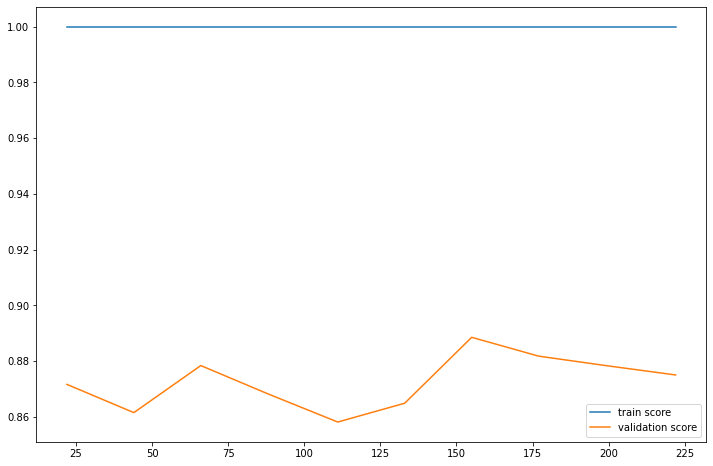

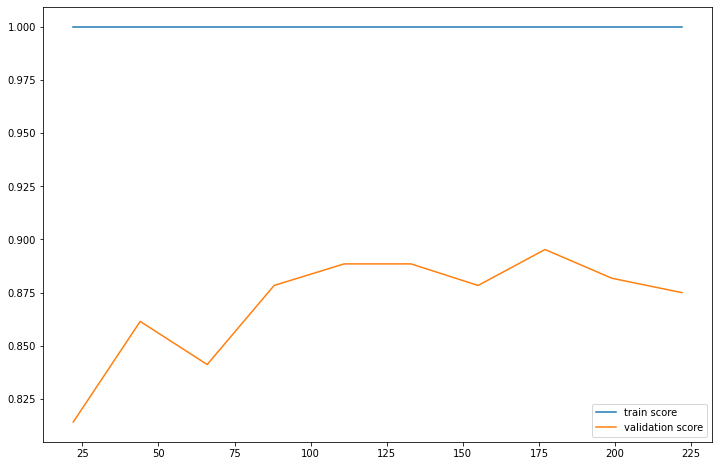

In [ ]:
# Models evaluation

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

The best precision is obtained with logistic regression. It is 0.8.
We improved the performance of the model using SMOTE before the algorithms. Moreover, the metric used is the accuracy because the dataset is balanced.

# SMOTE-BASED LOGISTIC REGRESSION MODEL OPTIMIZATION

In [ ]:
#from scipy.stats import uniform

# Create regularization penalty space
#penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
#C = uniform(loc=0, scale=4)
hyper_params2 = {'logisticregression__penalty':['l1', 'l2'],
                'logisticregression__C':[0.001, 0.01, 0.1, 1,10,100], 
                 'pipeline__polynomialfeatures__degree':[2, 5],
               'pipeline__selectkbest__k': range(45, 60)
               }
# Create hyperparameter options
#hyper_params2 = {"C":np.logspace(-3,3,7), "penalty":['l1', 'l2']}

# Create Random Search

In [ ]:
grid2= RandomizedSearchCV(LogisticRegression, hyper_params2, n_iter=100, scoring='accuracy', cv=4)

In [ ]:
LogisticRegression

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x7fbfaa8248c8>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                              

In [ ]:
# RandomizedSearchCv training
grid2.fit(x_train_smote, y_train_smote)

# Best hyperparameters display
print(grid2.best_params_)

# Prediction vector creation
y_pred = grid2.predict(x_test)

# Evaluation 
print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 46, 'pipeline__polynomialfeatures__degree': 2, 'logisticregression__penalty': 'l2', 'logisticregression__C': 10}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.56      0.42      0.48        12

    accuracy                           0.83        66
   macro avg       0.72      0.67      0.69        66
weighted avg       0.82      0.83      0.82        66



0.8333333333333334


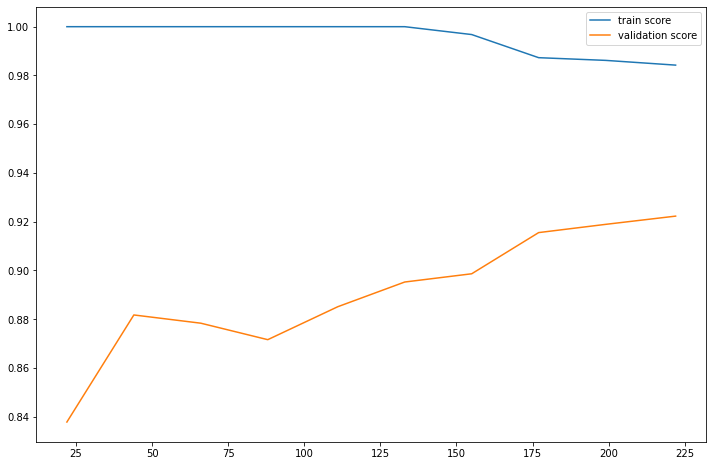

In [ ]:
evaluation(grid2.best_estimator_)

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid2.best_estimator_.decision_function(x_test))

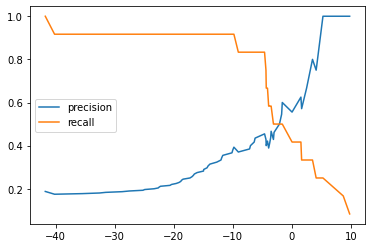

In [ ]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
# Final model creation
def model_final2(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final2(grid2.best_estimator_, x_test, threshold=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8333333333333334